# Twitch Top 200 Watched Games (2016-2021)

This dataset contains data about the top 200 games watched on the streaming platform Twitch from January 2016 until October 2021

__Size:__ 14000 rows x 12 columns

## Columns

__Rank:__ A number that identifies a game's position in the ranking for a given month and year

__Game:__ Title of the game

__Hours_watched:__ Sum of hours the viewers spent watching a game during that month

__Hours_streamed:__ Sum of hours streamers spent playing a game during that month

__Peak_viewers:__ Peak number of concurrent viewers a specific game reached in that month

__Peak_channels:__ Peak number of concurrent streamers playing a specific game in that month

__Streamers:__ Number of streamers that played a specific game in any given month

__Avg_viewers:__ Monthly average viewership of a specific game

__Avg_channels:__ How many streamers, on average, played a certain game during any given month

__Avg_viewer_ratio:__ View to channel ratio (average), i.e. avg_viewers/avg_channels

In [35]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
df = pd.read_csv("Twitch_game_data.csv")
df.head(10)

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
5,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88
6,7,World of Warcraft,1,2016,8771452,342978 hours,46130,1180,33375,11805,461,25.57
7,8,Z1: Battle Royale,1,2016,7894571,205569 hours,41588,460,21396,10625,276,38.40
8,9,Talk Shows & Podcasts,1,2016,7688369,53235 hours,84051,148,10779,10347,71,144.42
9,10,FIFA 16,1,2016,6988475,203646 hours,145728,756,46462,9405,274,34.32


### Changes to the dataset

I've decided to make some modifications to the original dataset that should help me do a better study, namely:
- there seems to be a single row that contained a NaN value in the "Game" column, which I replaced with an empty string
- added a "Date" column that puts together the "Month" and "Year" columns
- the "Hours_Streamed" column was a String type column that contained the number of hours plus the word "hour" which was removed and then I cast the column to a numeric value

In [37]:
df = df.fillna('')

date_column = df["Month"].astype(str) + "/" + df["Year"].astype(str)
df["Date"] = date_column
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m')

df["Hours_Streamed"] = pd.to_numeric(df["Hours_Streamed"].str.replace(" hours", ""))

df

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29,2016-01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62,2016-01
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26,2016-01
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29,2016-01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,196,Battlefield V,10,2021,657132,95847,20899,283,13189,884,129,6.86,2021-10
13996,197,Naraka: Bladepoint,10,2021,655856,34220,10748,125,2959,882,46,19.17,2021-10
13997,198,Hearts of Iron IV,10,2021,655665,14621,9832,60,1503,882,19,44.84,2021-10
13998,199,RISK: The Game of Global Domination,10,2021,648689,68,92496,2,18,873,0,9539.54,2021-10


### Twitch Growth

I will mostly be working with the "Game", "Date", "Hours_watched" and "Hours_Streamed" columns. Thus, I first create a dataframe that only contains those columns.

In [38]:
simple_df = df[["Game", "Hours_watched", "Hours_Streamed", "Date"]]
simple_df

,Game,Hours_watched,Hours_Streamed,Date
0,League of Legends,94377226,1362044,2016-01
1,Counter-Strike: Global Offensive,47832863,830105,2016-01
2,Dota 2,45185893,433397,2016-01
3,Hearthstone,39936159,235903,2016-01
4,Call of Duty: Black Ops III,16153057,1151578,2016-01
...,...,...,...,...
13995,Battlefield V,657132,95847,2021-10
13996,Naraka: Bladepoint,655856,34220,2021-10
13997,Hearts of Iron IV,655665,14621,2021-10
13998,RISK: The Game of Global Domination,648689,68,2021-10


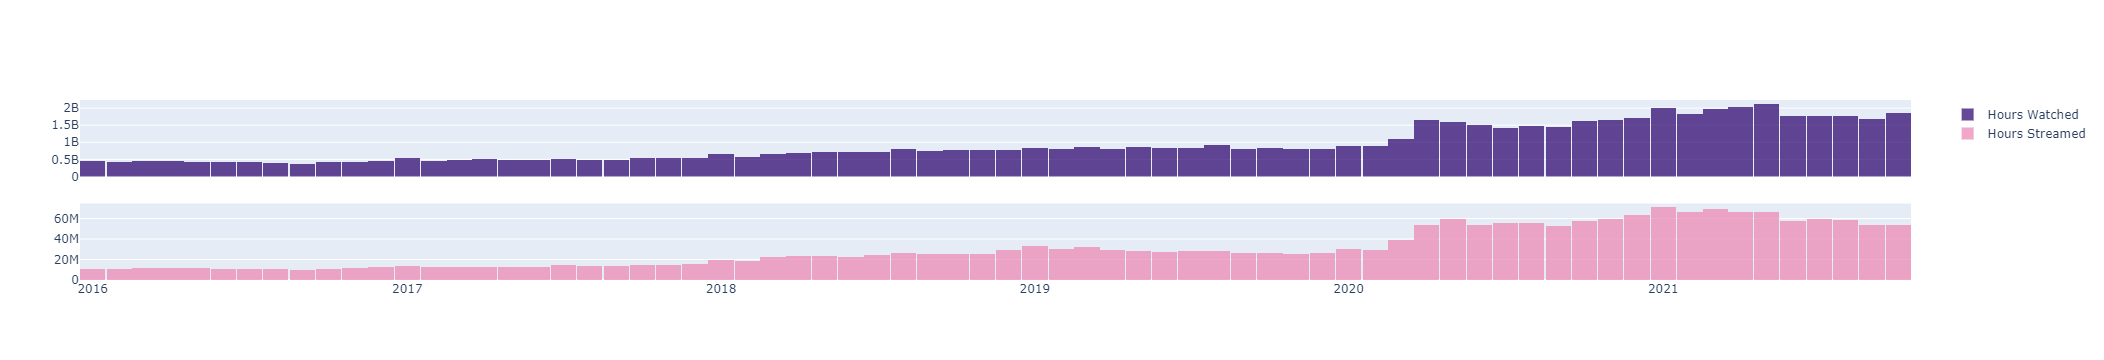

In [41]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, shared_yaxes=True)

fig.add_trace(go.Histogram(x=simple_df["Date"], y=simple_df["Hours_watched"], name="Hours Watched", histfunc='sum', opacity=0.75, marker_color='#330C73'), row=1, col=1)
fig.add_trace(go.Histogram(x=simple_df["Date"], y=simple_df["Hours_Streamed"], name="Hours Streamed", histfunc='sum', opacity=0.75, marker_color='#EB89B5'), row=2, col=1)

### Individual Games' Growth

At this point I only want to work with 4-5 games that have been present on the top 200 since 2016. Namely: Counter-Strike: Global Offensive, Dota 2, Grand Theft Auto V, League of Legends, and Rust.

I also changed the index so it looks a bit better.

In [42]:
simpler_df = simple_df[(simple_df["Game"] == "League of Legends") | (simple_df["Game"] == "Counter-Strike: Global Offensive") | (simple_df["Game"] == "Dota 2")
                       | (simple_df["Game"] == "Grand Theft Auto V") | (simple_df["Game"] == "Rust")]
simpler_df.index = range(1,len(simpler_df)+1)
simpler_df

,Game,Hours_watched,Hours_Streamed,Date
1,League of Legends,94377226,1362044,2016-01
2,Counter-Strike: Global Offensive,47832863,830105,2016-01
3,Dota 2,45185893,433397,2016-01
4,Grand Theft Auto V,4014296,407172,2016-01
5,Rust,1346240,47734,2016-01
...,...,...,...,...
346,League of Legends,208574800,2489811,2021-10
347,Grand Theft Auto V,136934555,1813736,2021-10
348,Dota 2,98815597,701658,2021-10
349,Counter-Strike: Global Offensive,70180423,956368,2021-10


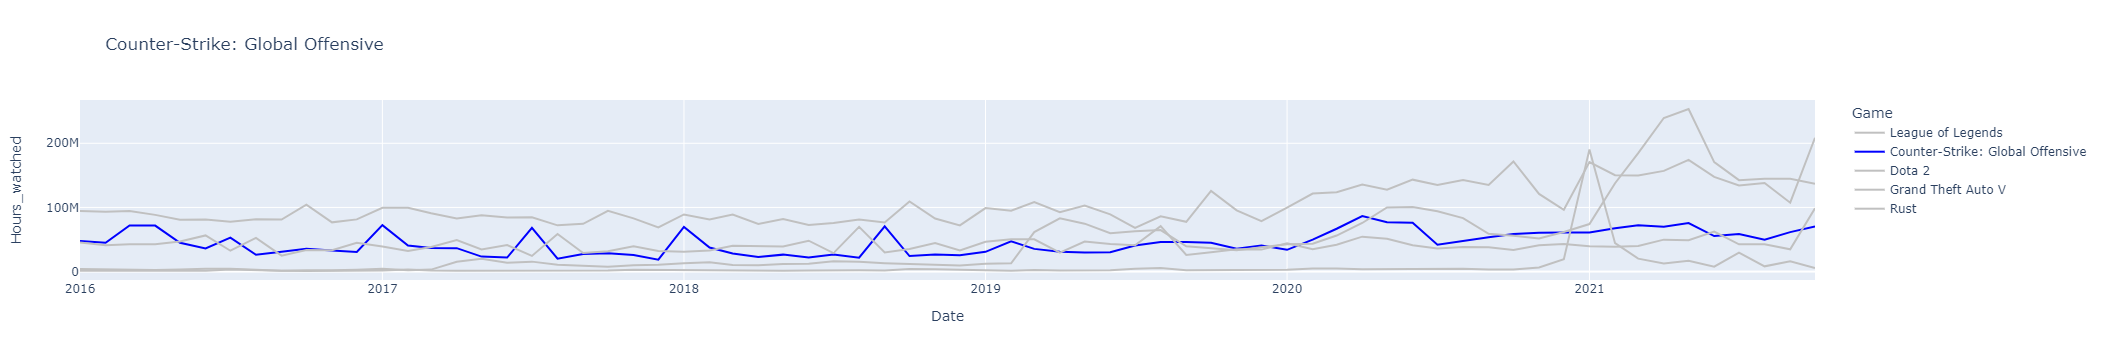

In [43]:
px.line(simpler_df, x="Date", y="Hours_watched", color="Game",
        title="Counter-Strike: Global Offensive",
        color_discrete_map={
                "Counter-Strike: Global Offensive": "blue", "Dota 2": "silver", "Grand Theft Auto V": "silver", "League of Legends": "silver", "Rust": "silver"
        })

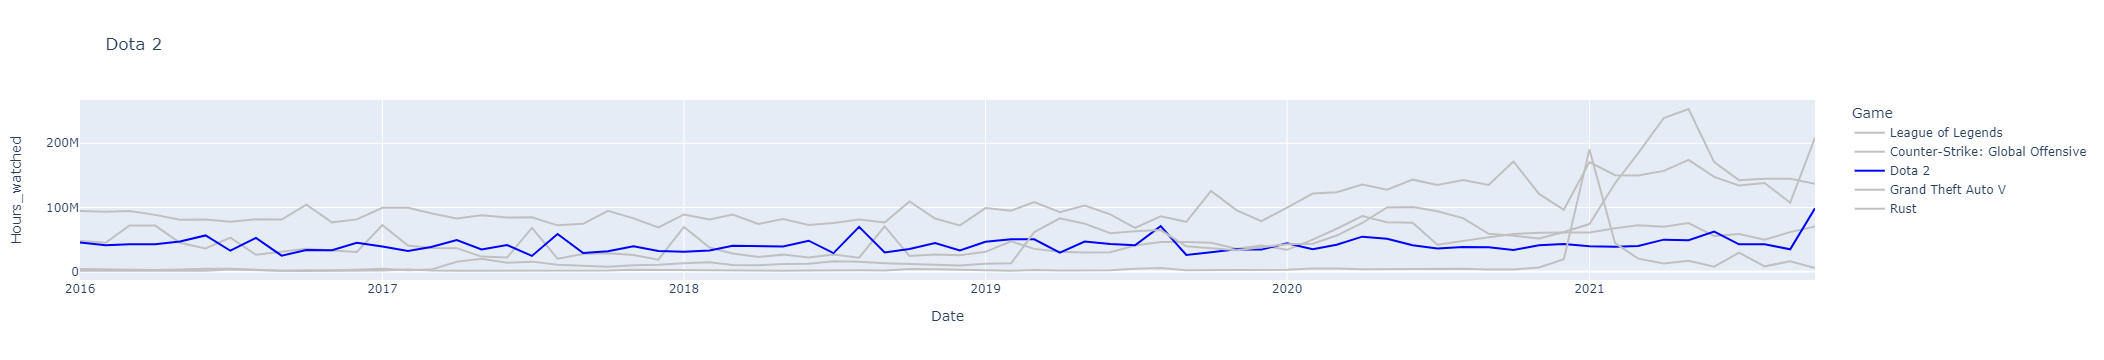

In [44]:
px.line(simpler_df, x="Date", y="Hours_watched", color="Game",
        title="Dota 2",
        color_discrete_map={
                "Counter-Strike: Global Offensive": "silver", "Dota 2": "blue", "Grand Theft Auto V": "silver", "League of Legends": "silver", "Rust": "silver"
        })

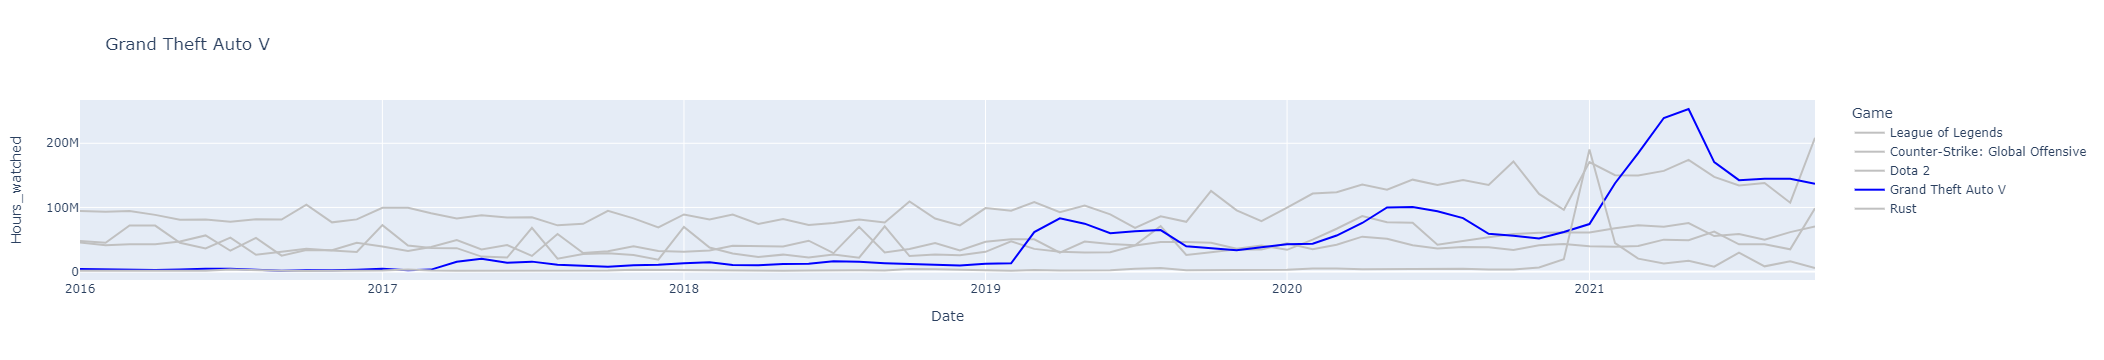

In [45]:
px.line(simpler_df, x="Date", y="Hours_watched", color="Game",
        title="Grand Theft Auto V",
        color_discrete_map={
                "Counter-Strike: Global Offensive": "silver", "Dota 2": "silver", "Grand Theft Auto V": "blue", "League of Legends": "silver", "Rust": "silver"
        })

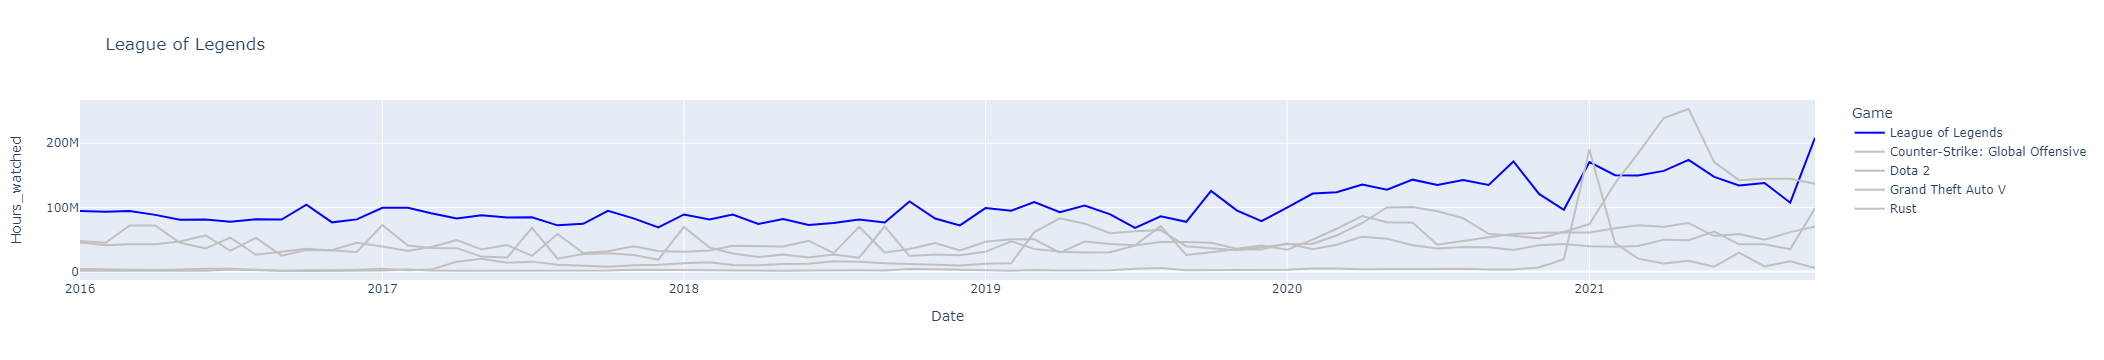

In [46]:
px.line(simpler_df, x="Date", y="Hours_watched", color="Game",
        title="League of Legends",
        color_discrete_map={
                "Counter-Strike: Global Offensive": "silver", "Dota 2": "silver", "Grand Theft Auto V": "silver", "League of Legends": "blue", "Rust": "silver"
        })

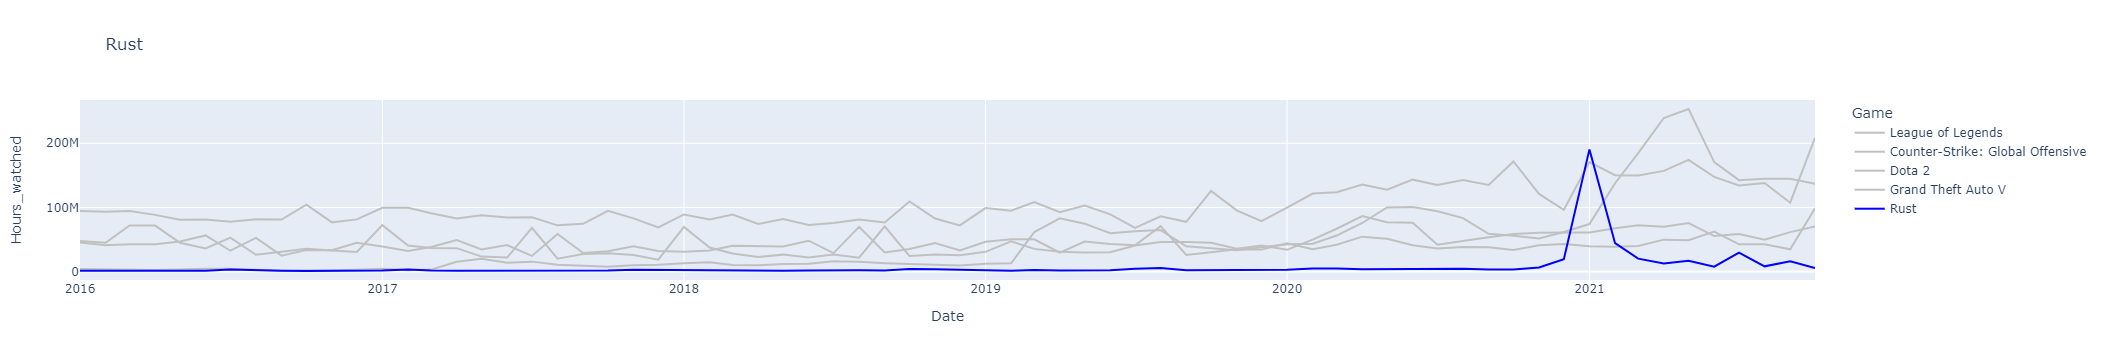

In [47]:
px.line(simpler_df, x="Date", y="Hours_watched", color="Game",
        title="Rust",
        color_discrete_map={
                "Counter-Strike: Global Offensive": "silver", "Dota 2": "silver", "Grand Theft Auto V": "silver", "League of Legends": "silver", "Rust": "blue"
        })